# Data Preparation

In [3]:
'''
    - imports for data processing
    - Organize data into train, valid, test dirs (70/15/15)
    - Color Data Augmentation
'''

'\n    - imports for data processing\n    - Devide the data into train/val/test (70/15/15)\n    - Color Data Augmentation\n'

In [10]:
# imports for data processing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
import os
import shutil
import random
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Organize data into train, valid, test dirs
os.chdir('C:/Users/Anastasia/Projects/ASL/ASL')
if os.path.isdir('train/A') is False: 
    os.mkdir('train')
    os.mkdir('valid')
    os.mkdir('test')

    for filename in os.listdir('C:/Users/Anastasia/Projects/ASL/ASL'):
        if filename != 'train' and filename != 'valid' and filename != 'test':
            shutil.move(f'{filename}', 'train')
            os.mkdir(f'valid/{filename}')
            os.mkdir(f'test/{filename}')

            valid_samples = random.sample(os.listdir(f'train/{filename}'), 300)
            for j in valid_samples:
                shutil.move(f'train/{filename}/{j}', f'valid/{filename}')

            test_samples = random.sample(os.listdir(f'train/{filename}'), 300)
            for k in test_samples:
                shutil.move(f'train/{filename}/{k}', f'test/{filename}')
os.chdir('../..')

In [13]:
# Color Data Augmentation
gen = ImageDataGenerator(
    rotation_range=10, 
    width_shift_range=0.1,
    height_shift_range=0.1, 
    brightness_range=(0.2, 0.8), 
    shear_range=0.15, 
    zoom_range=0.15,
    channel_shift_range=0.15,
    horizontal_flip=True, 
    vertical_flip=True, 
)

for filename in os.listdir('C:/Users/Anastasia/Projects/ASL/ASL/test'):
    for image in os.listdir('C:/Users/Anastasia/Projects/ASL/ASL/test/' + filename):
        image_path = 'C:/Users/Anastasia/Projects/ASL/ASL/test/' + filename + '/' + image
        image = np.expand_dims(plt.imread(image_path),0)
        aug_iter = gen.flow(image, save_to_dir='C:/Users/Anastasia/Projects/ASL/ASL/test/' + filename, save_prefix='aug-image-', save_format='jpeg')
        aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(4)]

for filename in os.listdir('C:/Users/Anastasia/Projects/ASL/ASL/train'):
    for image in os.listdir('C:/Users/Anastasia/Projects/ASL/ASL/train/' + filename):
        image_path = 'C:/Users/Anastasia/Projects/ASL/ASL/train/' + filename + '/' + image
        image = np.expand_dims(plt.imread(image_path),0)
        aug_iter = gen.flow(image, save_to_dir='C:/Users/Anastasia/Projects/ASL/ASL/train/' + filename, save_prefix='aug-image-', save_format='jpeg')
        aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(4)]

for filename in os.listdir('C:/Users/Anastasia/Projects/ASL/ASL/valid'):
    for image in os.listdir('C:/Users/Anastasia/Projects/ASL/ASL/valid/' + filename):
        image_path = 'C:/Users/Anastasia/Projects/ASL/ASL/valid/' + filename + '/' + image
        image = np.expand_dims(plt.imread(image_path),0)
        aug_iter = gen.flow(image, save_to_dir='C:/Users/Anastasia/Projects/ASL/ASL/valid/' + filename, save_prefix='aug-image-', save_format='jpeg')
        aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(4)]

In [17]:
# Devision to train/ valid, and test

train_path = 'C:/Users/Anastasia/Projects/ASL/ASL/train'
valid_path = 'C:/Users/Anastasia/Projects/ASL/ASL/valid'
test_path = 'C:/Users/Anastasia/Projects/ASL/ASL/test'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_v3.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_v3.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_v3.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 248526 images belonging to 29 classes.
Found 41442 images belonging to 29 classes.
Found 41501 images belonging to 29 classes.


# Training

In [19]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [20]:
base_model = tf.keras.applications.inception_v3.InceptionV3()
x = base_model.output
predictions = Dense(29, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
for layer in model.layers[:-30]:
    layer.trainable = False
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=valid_batches,
            validation_steps=len(valid_batches),
            epochs=30,
            verbose=2
)

Epoch 1/30
24853/24853 - 934s - loss: 2.5288 - accuracy: 0.3737 - val_loss: 1.8564 - val_accuracy: 0.3925
Epoch 2/30
24853/24853 - 937s - loss: 1.5532 - accuracy: 0.3948 - val_loss: 1.3470 - val_accuracy: 0.4033
Epoch 3/30
24853/24853 - 938s - loss: 1.2793 - accuracy: 0.4100 - val_loss: 1.2251 - val_accuracy: 0.4149
Epoch 4/30
24853/24853 - 937s - loss: 1.1952 - accuracy: 0.4410 - val_loss: 1.1706 - val_accuracy: 0.4632
Epoch 5/30
24853/24853 - 937s - loss: 1.1375 - accuracy: 0.5002 - val_loss: 1.1157 - val_accuracy: 0.5243
Epoch 6/30
24853/24853 - 936s - loss: 1.0529 - accuracy: 0.5970 - val_loss: 0.9969 - val_accuracy: 0.6499
Epoch 7/30
24853/24853 - 937s - loss: 0.9188 - accuracy: 0.7063 - val_loss: 0.8585 - val_accuracy: 0.7311
Epoch 8/30
24853/24853 - 937s - loss: 0.7692 - accuracy: 0.7795 - val_loss: 0.7120 - val_accuracy: 0.8088
Epoch 9/30
24853/24853 - 937s - loss: 0.6409 - accuracy: 0.8328 - val_loss: 0.5987 - val_accuracy: 0.8604
Epoch 10/30
24853/24853 - 937s - loss: 0.5204 

In [37]:
# saving model
model.save('C:/Users/Anastasia/Projects/ASL/ASL_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:/Users/Anastasia/Projects/ASL/ASL_model\assets


# Test batch testing

In [44]:
from pylab import rcParams

In [23]:
test_labels = test_batches.classes

In [24]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [38]:
count = 0
for i in range(len(test_labels)):
    if (test_labels[i] != predictions.argmax(axis=1)[i]):
        count = count + 1
print('Test accuracy = ', (len(test_labels)-count)/len(test_labels))

Test accuracy=  0.970097106093829


In [25]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [47]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    rcParams['figure.figsize'] = 5, 10

In [27]:
test_batches.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25,
 'del': 26,
 'nothing': 27,
 'space': 28}

Confusion matrix, without normalization
[[1402    0    0    0   13    0    0    0    0    0    0    0    3    0
     0    0    0    0    6    4    0    0    2    0    0    6    0    0
     0]
 [   0 1400    0    1   14    1    0    0    4    0    1    0    2    0
     0    0    0    0    1    0    3    0    1    0    0    0    0    1
     0]
 [   0    4 1422    1    3    0    0    0    2    0    0    0    0    0
     1    0    1    0    0    0    0    0    0    0    0    0    1    0
     2]
 [   0    1    1 1387    3    0    0    0    2    0    1    0    0    0
    16    4    0    0    0    0    1    1    0    0    0    0    0    0
     0]
 [   8    7    0    0 1391    0    0    0    7    0    0    0    0    1
     0    0    0    1    7    2    5    0    0    0    0    4    0    1
     0]
 [   0    0    3    0    3 1412    0    0    0    0    0    1    0    0
     1    0    0    0    0    1    0    0    1    0    0    0    0    0
     0]
 [   0    0    1    0    0    0 1384   24    3  

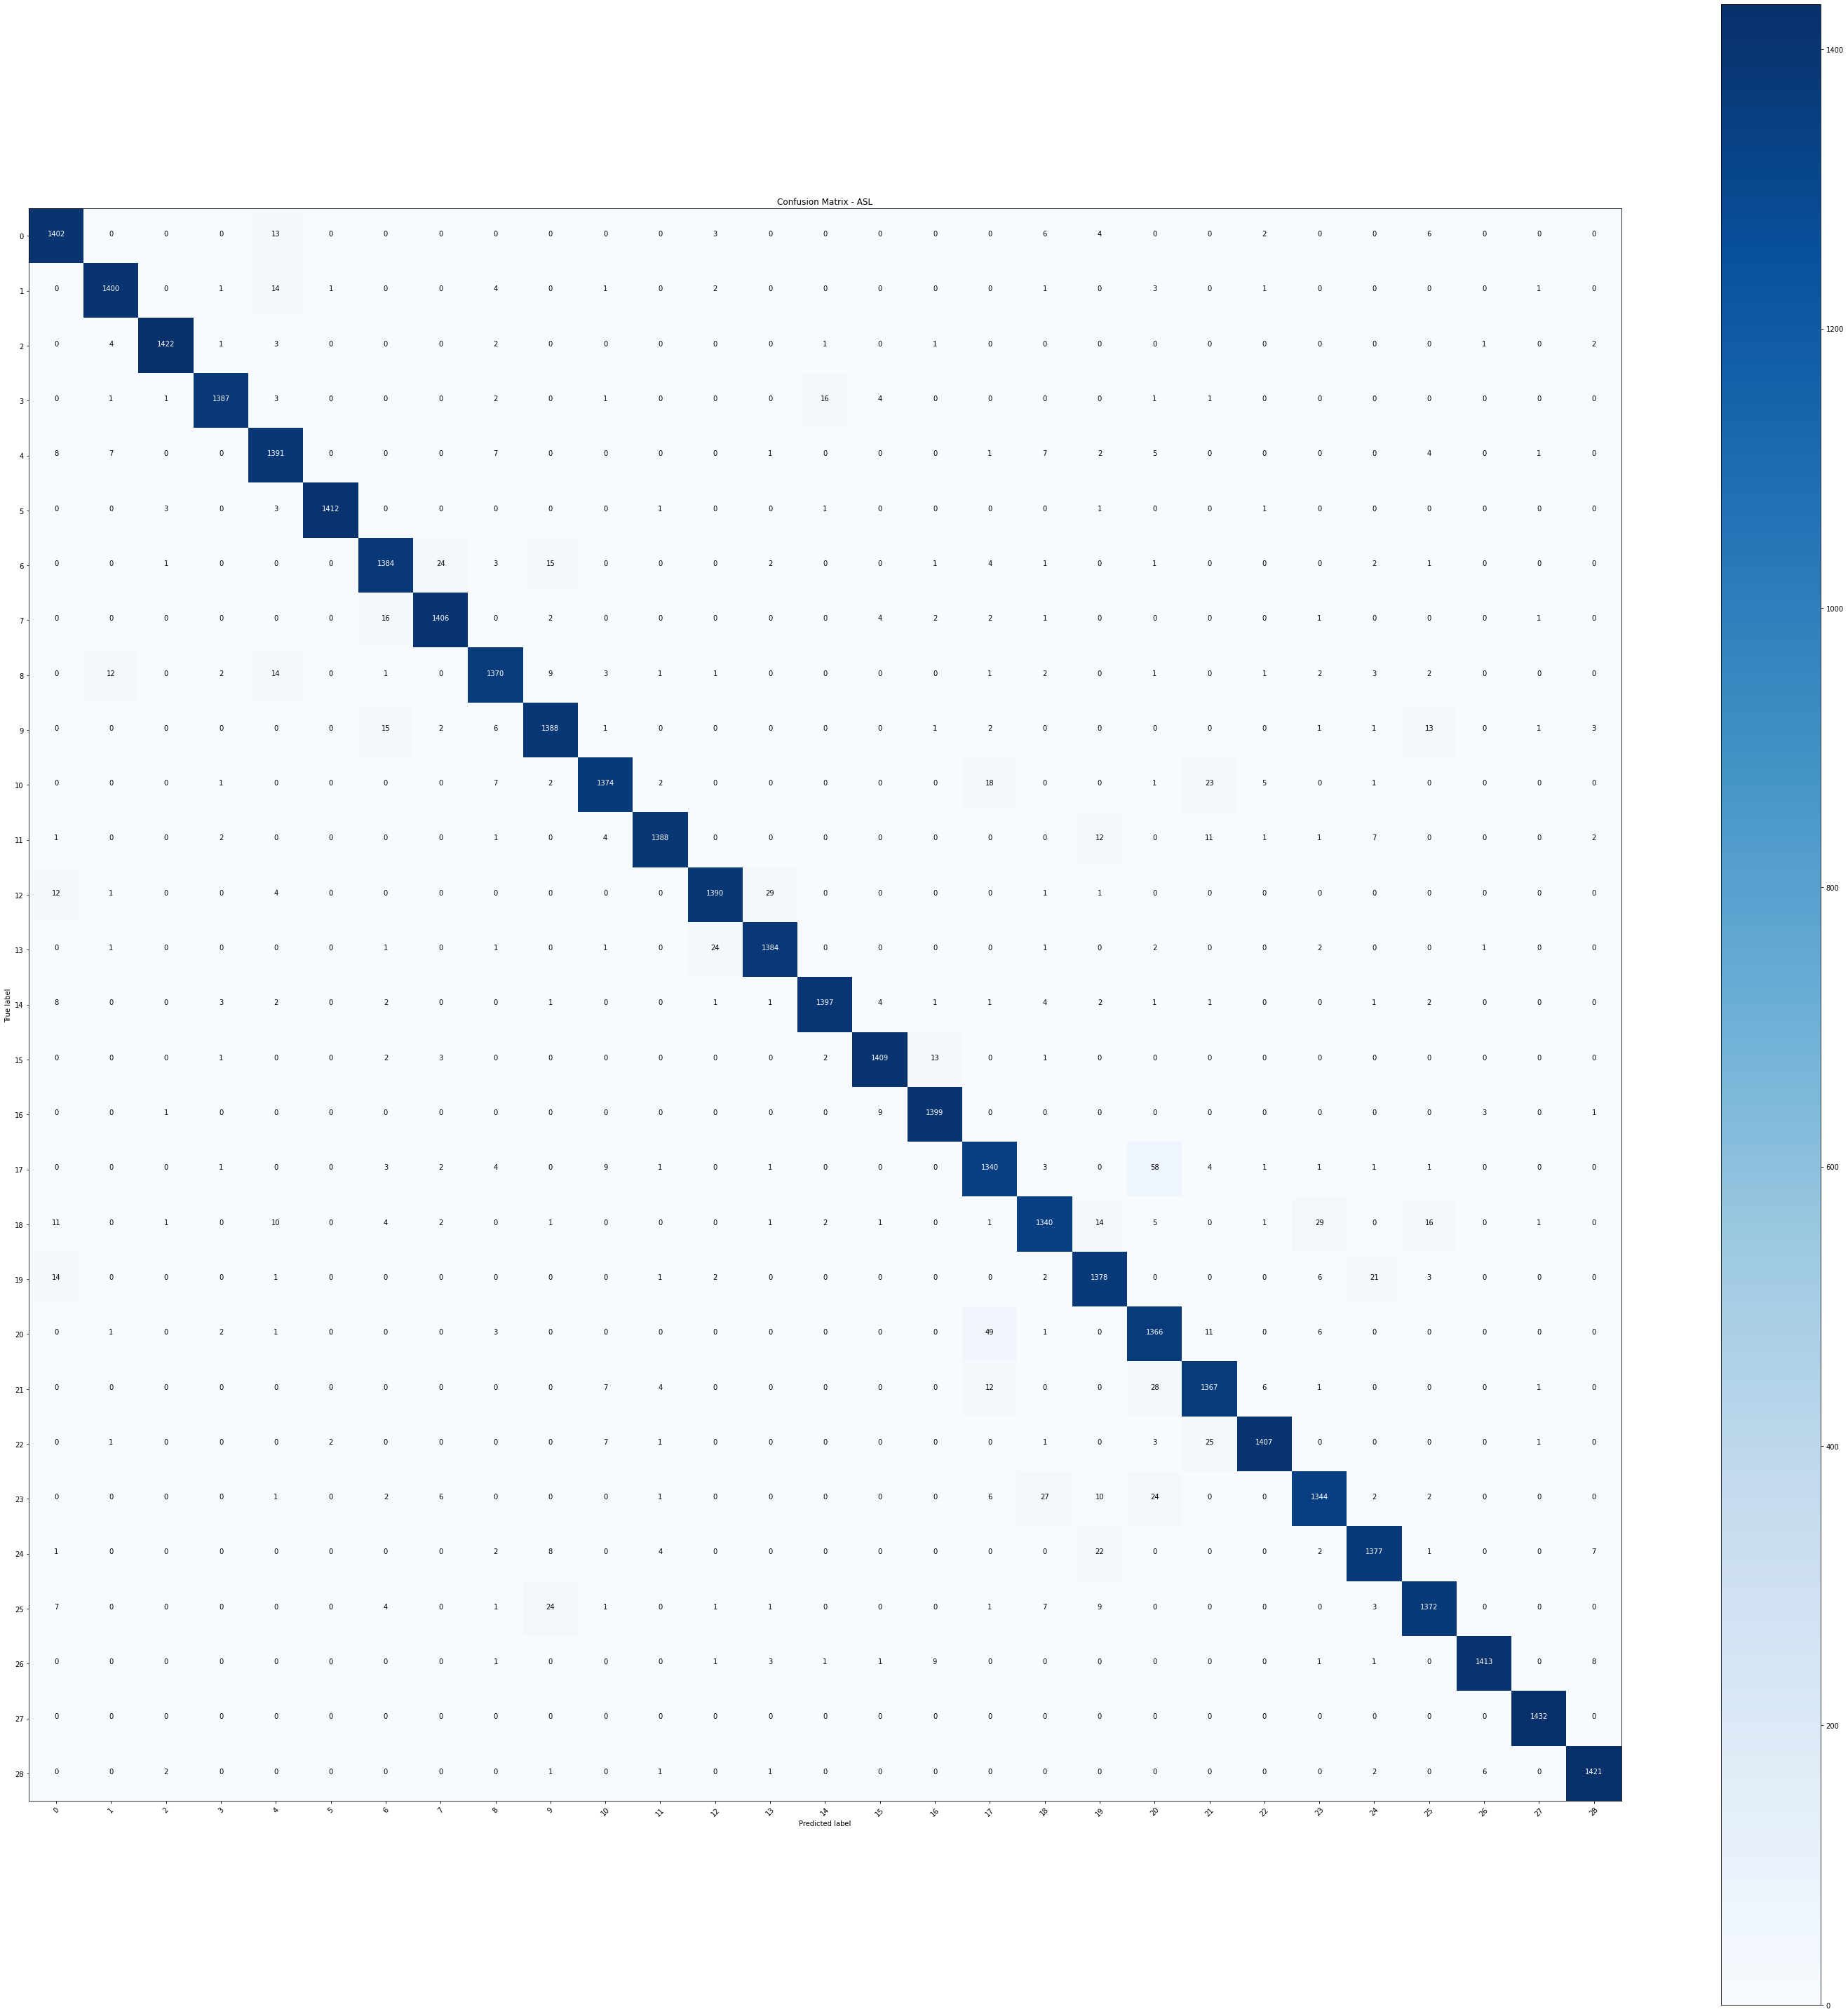

In [42]:
cm_plot_labels = ['0','1','2','3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix - ASL')

# Random Sample testing

In [48]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import preprocess_input
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

def prediction(image_path, model):
    
    #Plot the image
    img = mpimg.imread(image_path)
    imgplot = plt.imshow(img)
    
    #load the image
    my_image = load_img(image_path, target_size=(224, 224))

    #preprocess the image
    my_image = img_to_array(my_image)
    my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
    my_image = preprocess_input(my_image)

    #make the prediction
    prediction = model.predict(my_image)
    return prediction.argmax(axis=1)

[27]


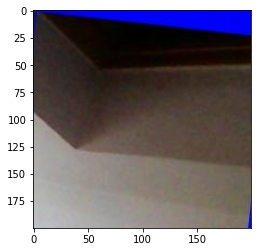

In [51]:
# Test 1
print(prediction('C:/Users/Anastasia/Projects/ASL/ASL/test/nothing/aug-image-_0_106.jpeg', model))

[12]


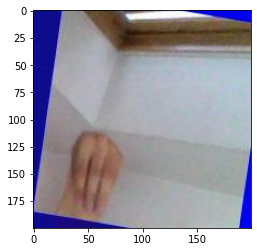

In [52]:
# Test 2
print(prediction('C:/Users/Anastasia/Projects/ASL/ASL/test/M/aug-image-_0_54.jpeg', model))